In [1]:
import os
import pandas as pd

from notebooks.snipet_plot import fig

In [2]:
row_path = os.path.join('..',  'data', 'raw')
interim_path = os.path.join('..', 'data', 'interim')

In [3]:
df = pd.read_csv(os.path.join(row_path, 'artwork_data.csv'), low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69201 entries, 0 to 69200
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69201 non-null  int64  
 1   accession_number    69201 non-null  object 
 2   artist              69201 non-null  object 
 3   artistRole          69201 non-null  object 
 4   artistId            69201 non-null  int64  
 5   title               69201 non-null  object 
 6   dateText            69201 non-null  object 
 7   medium              62817 non-null  object 
 8   creditLine          69198 non-null  object 
 9   year                63823 non-null  object 
 10  acquisitionYear     69156 non-null  float64
 11  dimensions          66768 non-null  object 
 12  width               65860 non-null  object 
 13  height              65860 non-null  object 
 14  depth               2514 non-null   float64
 15  units               65860 non-null  object 
 16  insc

In [10]:
df.dtypes

id                      int64
accession_number       object
artist                 object
artistRole             object
artistId                int64
title                  object
dateText               object
medium                 object
creditLine             object
year                   object
acquisitionYear       float64
dimensions             object
width                  object
height                 object
depth                 float64
units                  object
inscription            object
thumbnailCopyright     object
thumbnailUrl           object
url                    object
dtype: object

In [5]:
df['width'] = pd.to_numeric(df['width'], errors='coerce')

In [6]:
df['width'].dtypes

dtype('float64')

In [7]:
df['width'].value_counts()

width
113.0      2096
114.0      1204
155.0       976
112.0       946
118.0       928
           ... 
2090.0        1
10900.0       1
8915.0        1
5410.0        1
2350.0        1
Name: count, Length: 1968, dtype: int64

In [10]:
df['width'].unique()

array([ 394.,  311.,  343., ..., 1198., 2310., 2093.], shape=(1969,))

In [11]:
df['width'].nunique()

1968

In [12]:
df['height'] = pd.to_numeric(df['height'], errors='coerce')

In [13]:
area = df['width'] * df['height']
df = df.assign(area=area)

In [14]:
df.loc[df['width'] > df['width'].mean()]

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url,area
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,...,support: 394 x 419 mm,394.0,419.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...,165086.0
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,...,support: 343 x 467 mm,343.0,467.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,160181.0
32,1067,A00033,"Blake, William",artist,39,Sketch for ‘The Four and Twenty Elders Casting...,"c.1803, c.1805–10",Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1803,...,support: 488 x 389 mm,488.0,389.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-sket...,189832.0
42,1077,A00043,"Blake, William",artist,39,Preliminary Sketch for ‘Christ Girding Himself...,"c.1805, c.1805–10",Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1805,...,support: 505 x 425 mm,505.0,425.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-prel...,214625.0
44,1079,A00045,"Blake, William",artist,39,"St Christopher, Copy from an Engraving? Verso:...",?c.1779–80,Ink on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1779,...,support: 435 x 338 mm,435.0,338.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-st-c...,147030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69185,127129,T13854,"Lord, Andrew",artist,7268,biting,1996–8,"Ceramic, epoxy, gold leaf, encre de Chine and ...",Purchased with assistance from the Karpidas Fa...,1996,...,object: 705 x 470 x 450 mm object: 747 x 440 x...,705.0,470.0,450.0,mm,NaN,© Andrew Lord,http://www.tate.org.uk/art/images/work/T/T13/T...,http://www.tate.org.uk/art/artworks/lord-bitin...,331350.0
69186,127130,T13855,"Lord, Andrew",artist,7268,breathing,1996–2000,"Ceramic, epoxy, gold leaf, encre de Chine and ...",Purchased with assistance from the Karpidas Fa...,1996,...,object: 408 x 205 x 200 mm object: 930 x 915 x...,408.0,205.0,200.0,mm,NaN,© Andrew Lord,http://www.tate.org.uk/art/images/work/T/T13/T...,http://www.tate.org.uk/art/artworks/lord-breat...,83640.0
69187,127131,T13856,"Lord, Andrew",artist,7268,Untitled (from the Gauguin Series),2004–12,"Ceramic, silver and epoxy",Purchased with assistance from the Karpidas Fa...,2004,...,object: 410 x 317 x 394 mm,410.0,317.0,394.0,mm,NaN,© Andrew Lord,http://www.tate.org.uk/art/images/work/T/T13/T...,http://www.tate.org.uk/art/artworks/lord-untit...,129970.0
69192,123620,T13861,"Sterne, Hedda",artist,16798,"NY, NY No. X",1948,Oil paint on canvas,Presented by Clara Diament Sujo 2012,1948,...,unconfirmed: 810 x 1155 mm,810.0,1155.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/sterne-ny-...,935550.0


In [15]:
df['width'].isnull().sum()

np.int64(3367)

In [16]:
df['area'].idxmax()

1903

In [17]:
df.loc[df['area'].idxmax(), 'url']

'http://www.tate.org.uk/art/artworks/therrien-no-title-table-and-four-chairs-ar00166'

In [39]:
df.loc[df['width'].isnull(), 'artist']

50       British School 18th century
51       British School 18th century
52       British School 18th century
53       British School 18th century
54       British School 18th century
                    ...             
69188                    Rhodes, Lis
69190           Andrade, Jonathas de
69191                  Oursler, Tony
69193                Flanagan, Barry
69199                  Creed, Martin
Name: artist, Length: 3367, dtype: object

In [18]:
df.loc[(df['width'] > 200) & (df['height'] < 50) , 'artist']

2913                         Katz, Alex
3019     Turner, Joseph Mallord William
57631                        Gabo, Naum
63137                Wentworth, Richard
67396                    Mariën, Marcel
67525                     Cadere, André
67599                       Lambie, Jim
67771                     Gillick, Liam
67848                  Gallagher, Ellen
67896               Dimitrijevic, Braco
68987                   Musgrave, David
Name: artist, dtype: object

In [19]:
df_small = df.iloc[49000:50000].copy()

In [45]:
df_small.to_excel(os.path.join(interim_path, 'df_small.xlsx'))

In [48]:
df_small.to_excel(os.path.join(interim_path, 'df_small_columns.xlsx'), columns = ['artistId', 'artist', 'area'])

In [54]:
writer = pd.ExcelWriter(os.path.join(interim_path, 'multiple_sheets_data_2.xlsx'),engine='xlsxwriter')
df_small.to_excel(writer, sheet_name='Preview', index=False )
df.iloc[:30000].to_excel(writer, sheet_name='Complete', index=False)
writer.close()

In [56]:
import sqlite3

with sqlite3.connect(os.path.join(interim_path,'db.sqlite_2')) as conn:
    df_small.to_sql('Tate_2', conn)

In [57]:
with sqlite3.connect(os.path.join(interim_path,'db.sqlite_2')) as conn:
    df_sql = pd.read_sql('SELECT * FROM Tate_2', conn)

In [58]:
df_sql

,index,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,...,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url,area
0,49000,5598,P06784,"Grau, Enrique",artist,1204,Jewel Box,1977,Lithograph on paper,Presented by Curwen Studio 1978,...,image: 645 x 540 mm,645.0,540.0,NaN,mm,None,None,None,http://www.tate.org.uk/art/artworks/grau-jewel...,348300.0
1,49001,5847,P06785,"Boyd Harte, Glynn",artist,1249,[no title],1977,Lithograph on paper,Presented by Curwen Studio 1978,...,image: 775 x 575 mm,775.0,575.0,NaN,mm,None,None,None,http://www.tate.org.uk/art/artworks/boyd-harte...,445625.0
2,49002,5848,P06786,"Boyd Harte, Glynn",artist,1249,[no title],1977,Lithograph on paper,Presented by Curwen Studio 1978,...,image: 775 x 575 mm,775.0,575.0,NaN,mm,None,None,None,http://www.tate.org.uk/art/artworks/boyd-harte...,445625.0
3,49003,7748,P06787,"Jones, Stanley",artist,1373,Sheelin,1978,Lithograph on paper,Presented by Curwen Studio 1978,...,image: 600 x 419 mm,600.0,419.0,NaN,mm,date inscribed,© Stanley Jones,http://www.tate.org.uk/art/images/work/P/P06/P...,http://www.tate.org.uk/art/artworks/jones-shee...,251400.0
4,49004,7952,P06788,"King, Jeremy",artist,1410,Maple Durham Hill,1977,Lithograph on paper,Presented by Curwen Studio 1978,...,image: 394 x 521 mm,394.0,521.0,NaN,mm,None,© Jeremy King,http://www.tate.org.uk/art/images/work/P/P06/P...,http://www.tate.org.uk/art/artworks/king-maple...,205274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49995,16427,P07966,Wols,artist,2164,[no title],c.1937–50,Etching and drypoint on paper,Purchased 1983,...,image: 105 x 98 mm,105.0,98.0,NaN,mm,None,"© ADAGP, Paris and DACS, London 2014",http://www.tate.org.uk/art/images/work/P/P07/P...,http://www.tate.org.uk/art/artworks/wols-no-ti...,10290.0
996,49996,16428,P07967,Wols,artist,2164,[no title],c.1937–50,Etching and drypoint on paper,Purchased 1983,...,image: 197 x 149 mm,197.0,149.0,NaN,mm,None,"© ADAGP, Paris and DACS, London 2014",http://www.tate.org.uk/art/images/work/P/P07/P...,http://www.tate.org.uk/art/artworks/wols-no-ti...,29353.0
997,49997,16429,P07968,Wols,artist,2164,[no title],c.1937–50,Etching and drypoint on paper,Purchased 1983,...,image: 102 x 120 mm,102.0,120.0,NaN,mm,None,"© ADAGP, Paris and DACS, London 2014",http://www.tate.org.uk/art/images/work/P/P07/P...,http://www.tate.org.uk/art/artworks/wols-no-ti...,12240.0
998,49998,16430,P07969,Wols,artist,2164,[no title],c.1937–50,Etching and drypoint on paper,Purchased 1983,...,image: 118 x 95 mm,118.0,95.0,NaN,mm,None,"© ADAGP, Paris and DACS, London 2014",http://www.tate.org.uk/art/images/work/P/P07/P...,http://www.tate.org.uk/art/artworks/wols-no-ti...,11210.0


In [24]:
df['acquisitionYear'].idxmax()

2913

In [25]:
df['acquisitionYear'].astype('Int64')

0        1922
1        1922
2        1922
3        1922
4        1919
         ... 
69196    2013
69197    2013
69198    2013
69199    2013
69200    2013
Name: acquisitionYear, Length: 69201, dtype: Int64

In [26]:
df['acquisitionYear'].isnull().sum()

np.int64(45)

In [65]:
df.loc[df['acquisitionYear'].isnull()]

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url,area
40527,70275,D41510,"Turner, Joseph Mallord William",artist,558,Slight continuation of ‘Heidelberg: The Manhei...,date not known,NaN,Accepted by the nation as part of the Turner B...,NaN,...,support: 155 x 100 mm,155.0,100.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/D/D41/D...,http://www.tate.org.uk/art/artworks/turner-sli...,15500.0
40530,102543,D41513,"Turner, Joseph Mallord William",artist,558,"Sketch of a Tree, Possibly a Study for ‘An Old...",c.1830–2,Graphite on paper,Accepted by the nation as part of the Turner B...,1830,...,support: 191 x 248 mm,191.0,248.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-ske...,47368.0
40531,106178,D41514,"Turner, Joseph Mallord William",artist,558,"Ponte Salario, Rome",1819,Graphite on paper,Accepted by the nation as part of the Turner B...,1819,...,support: 255 x 404 mm,255.0,404.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-pon...,103020.0
40532,108224,D41515,"Turner, Joseph Mallord William",artist,558,"?Church of the Madonna delle Neve, Molina",1819,Graphite on paper,Accepted by the nation as part of the Turner B...,1819,...,support: 113 x 189 mm,113.0,189.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-chu...,21357.0
40533,108227,D41516,"Turner, Joseph Mallord William",artist,558,"Elevation of a House, Possibly a Design for Sa...",c.1810–12,Graphite on paper,Accepted by the nation as part of the Turner B...,1810,...,support: 223 x 279 mm,223.0,279.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-ele...,62217.0
40534,108328,D41517,"Turner, Joseph Mallord William",artist,558,Inscription by Turner: A Scale Marked in Inches,1817,Graphite on paper,Accepted by the nation as part of the Turner B...,1817,...,support: 232 x 328 mm,232.0,328.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-ins...,76096.0
40536,111177,D41519,"Turner, Joseph Mallord William",artist,558,Part of a Sketch of a Landscape,c.1819,Graphite on paper,Accepted by the nation as part of the Turner B...,1819,...,support: 100 x 99 mm,100.0,99.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-par...,9900.0
40537,115539,D41520,"Turner, Joseph Mallord William",artist,558,"A Valley between Trees, Perhaps in the West Co...",1811,Graphite on paper,Accepted by the nation as part of the Turner B...,1811,...,support: 75 x 117 mm,75.0,117.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-a-v...,8775.0
40538,115540,D41521,"Turner, Joseph Mallord William",artist,558,"Temple Bar, Clovelly",1811,Graphite on paper,Accepted by the nation as part of the Turner B...,1811,...,support: 117 x 75 mm,117.0,75.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-tem...,8775.0
40539,115541,D41522,"Turner, Joseph Mallord William",artist,558,Inscription by Turner: A Note on West Country ...,1811,Ink on paper,Accepted by the nation as part of the Turner B...,1811,...,support: 170 x 209 mm,170.0,209.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/turner-ins...,35530.0


In [27]:
df.dropna(inplace=False, axis=0, subset=['acquisitionYear']).shape

(69156, 21)

In [28]:
df.dropna(inplace=True, axis=0, subset=['acquisitionYear'])

In [29]:
df['acquisitionYear'].shape

(69156,)

In [30]:
df['acquisitionYear'].isnull().sum()

np.int64(0)

In [31]:
df['acquisitionYear'] = df['acquisitionYear'].astype('int64')

In [32]:
df['acquisitionYear'].dtypes

dtype('int64')

In [33]:
df['acquisitionYear'].value_counts()

acquisitionYear
1856    37893
1997     3706
1975     3046
2009     1364
1979     1166
        ...  
1855        1
1873        1
1870        1
1863        1
1834        1
Name: count, Length: 178, dtype: int64

In [34]:
df.loc[:10, 'acquisitionYear':]

,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url,area
0,1922,support: 394 x 419 mm,394.0,419.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...,165086.0
1,1922,support: 311 x 213 mm,311.0,213.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...,66243.0
2,1922,support: 343 x 467 mm,343.0,467.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,160181.0
3,1922,support: 318 x 394 mm,318.0,394.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...,125292.0
4,1919,image: 243 x 335 mm,243.0,335.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,81405.0
5,1919,image: 240 x 338 mm,240.0,338.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-ciam...,81120.0
6,1919,image: 242 x 334 mm,242.0,334.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,80828.0
7,1919,image: 246 x 340 mm,246.0,340.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,83640.0
8,1919,image: 241 x 335 mm,241.0,335.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,80735.0
9,1919,image: 243 x 340 mm,243.0,340.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,82620.0


In [37]:
df.groupby('acquisitionYear').size()

acquisitionYear
1823       1
1824       2
1826       4
1827       1
1828       3
        ... 
2009    1364
2010     392
2011     320
2012     514
2013     458
Length: 178, dtype: int64

In [38]:
acquisition_year = df.groupby('acquisitionYear').size()

In [39]:
type(acquisition_year)

pandas.core.series.Series

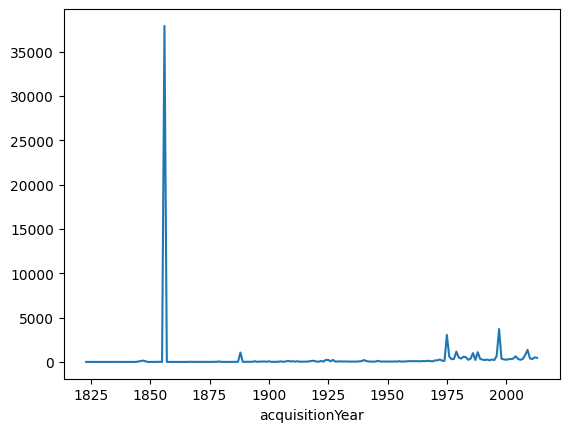

In [41]:
import matplotlib.pyplot as plt
acquisition_year.plot()
plt.show()

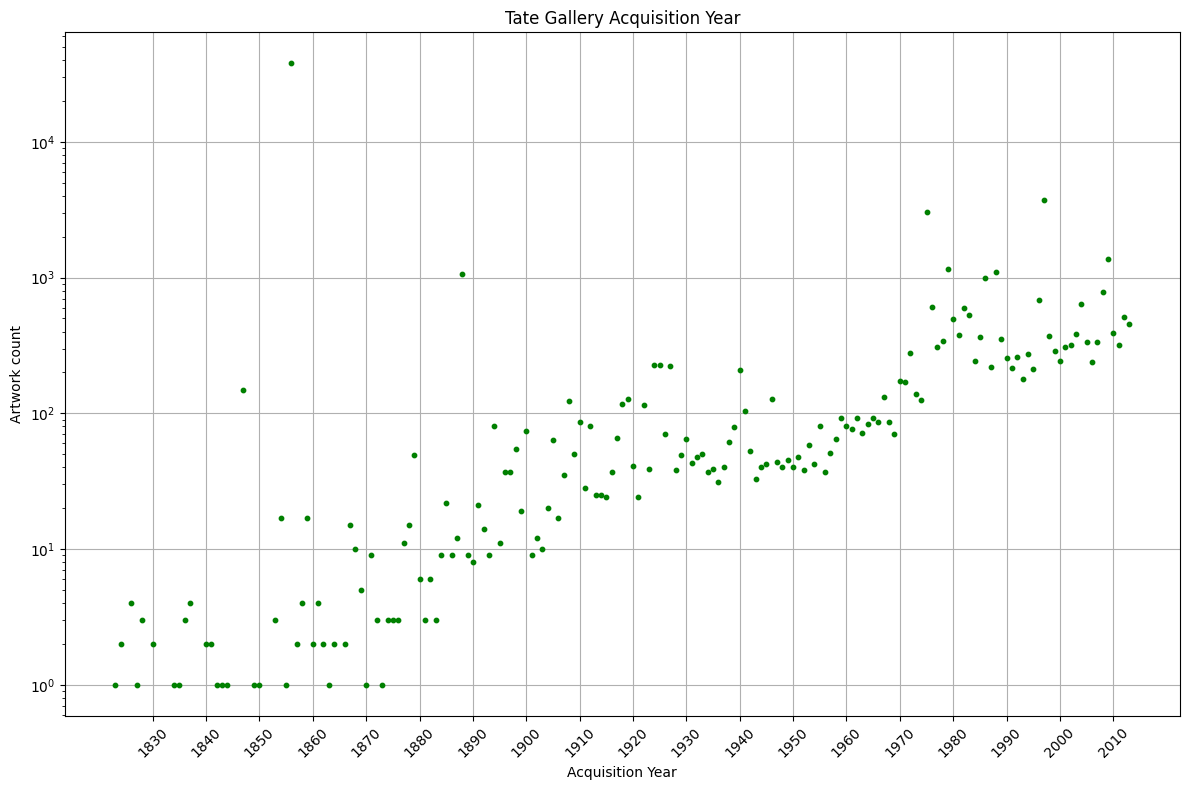

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))


ax.scatter(x=acquisition_year.index, y=acquisition_year, s=10, c='green')
ax.set_yscale('log')

ax.set_title('Tate Gallery Acquisition Year')
ax.set_xlabel('Acquisition Year')
ax.set_ylabel('Artwork count')

ticks = [year for year in acquisition_year.index if year % 10 == 0]

ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation=45)

ax.grid(True)
ax.set_axisbelow(True)

fig.tight_layout()
plt.show()

In [63]:
fig.savefig(os.path.join('..', 'reports', 'figures', 'tate_work_check.png'))

In [64]:
fig.savefig(os.path.join('..', 'reports', 'figures', 'tate_work_check.svg'), format='svg')